# **Cardiovascular Disease Prediction💕**

---



*Heart disease, also known as cardiovascular disease, is one of the most serious illnesses in both India and the rest of the globe. According to estimates, cardiac illnesses account for 28.1% of fatalities. More than 17.6 million fatalities, or a large portion of all deaths in 2016, were caused by it in 2016. Therefore, a system that can predict with exact precision and dependability is required for the appropriate and prompt diagnosis as well as the treatment of such diseases. Numerous academics do extensive research utilising a variety of machine learning algorithms to predict heart illness using different datasets that contain numerous factors that lead to heart attacks. Now it is your turn to do a analysis with the given dataset.*

### **Data Preprocessing**

In [ ]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report

In [ ]:
#reading the data set
heart = pd.read_csv('/content/drive/MyDrive/AI Projects/Project 1 - Cardiovascular Disease Prediction using Machine Learing/Cardio.csv')
heart

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# To display the top 5 rows
heart.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# To display the bottom 5 rows
heart.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [ ]:
# To display shape of the dataset
heart.shape

(70000, 13)

In [ ]:
# to display all column names
heart.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
# To display info details
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# To display unique values
heart.nunique()

id             70000
age             8076
gender             2
height           109
weight           287
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

In [ ]:
# description of the dataset
heart.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# To check the number of duplicated values
heart.duplicated().sum()

0

In [ ]:
# to check is there any null values and their sum count
heart.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#Find Age Given Data
heart['age'] = heart['age'].apply(lambda x: x/365)

In [ ]:
heart['age'] = heart['age'].apply(lambda x: int(x))

In [ ]:
heart.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
X = heart.drop('cardio', axis=1)
y = heart['cardio']

In [ ]:
#Data Transformation
y = pd.get_dummies(y) # OHE
y.head()

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


### **Data Analysis And Visualizations**

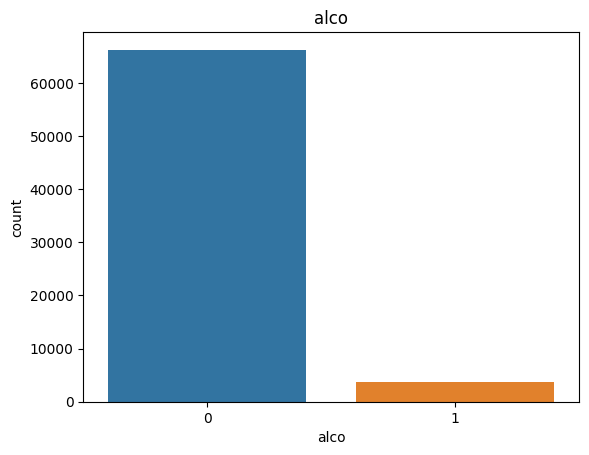

In [ ]:
# Exploring the target variable
sns.countplot(x='alco', data=heart)
plt.title('alco')
plt.show()

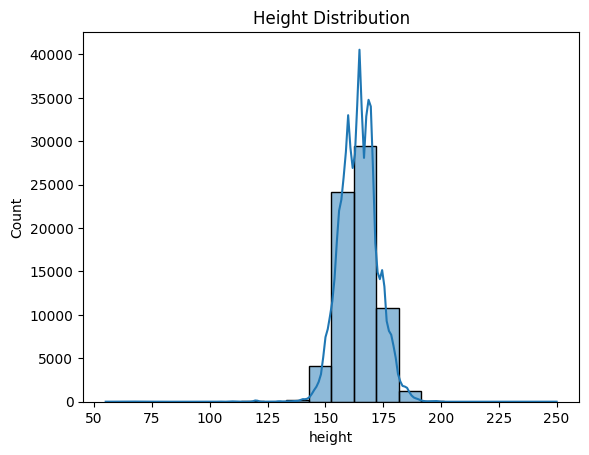

In [ ]:
# Visualize the distribution of 'height'
sns.histplot(heart['height'], bins=20, kde=True)
plt.title('Height Distribution')
plt.show()

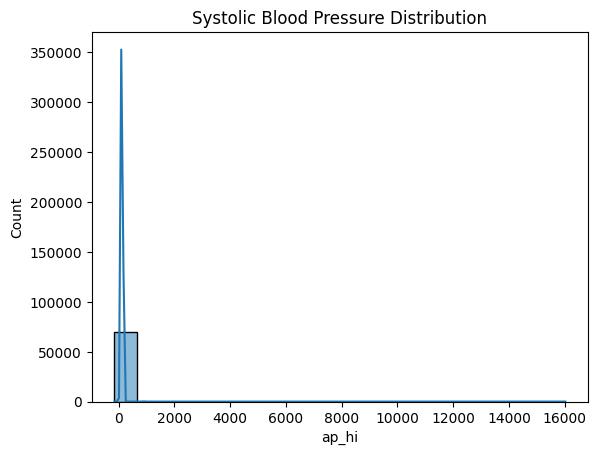

In [ ]:
# Visualize the distribution of 'ap_hi' (systolic blood pressure)
sns.histplot(heart['ap_hi'], bins=20, kde=True)
plt.title('Systolic Blood Pressure Distribution')
plt.show()

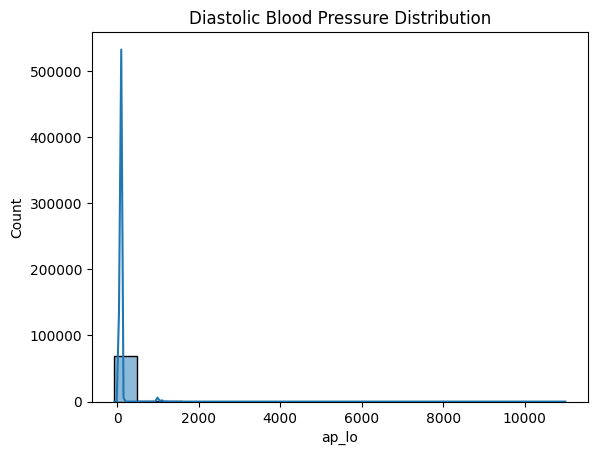

In [ ]:
# Visualize the distribution of 'ap_lo' (diastolic blood pressure)
sns.histplot(heart['ap_lo'], bins=20, kde=True)
plt.title('Diastolic Blood Pressure Distribution')
plt.show()

<Axes: >

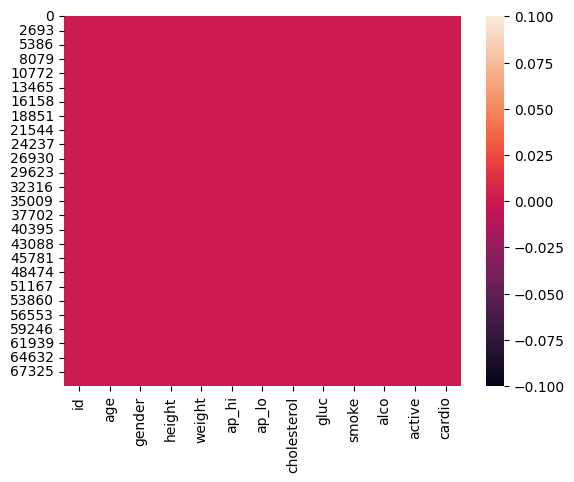

In [ ]:
# heatmap for null values
sns.heatmap(heart.isnull())

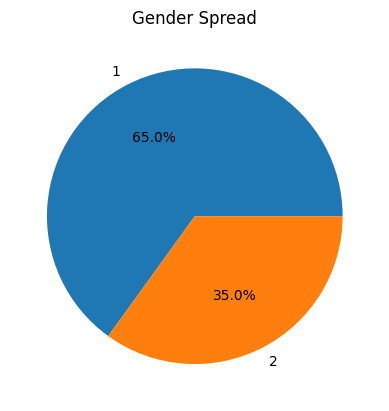

In [ ]:
gender_spread = heart['gender'].value_counts()
gender_spread.plot.pie(autopct='%1.1f%%')
plt.title("Gender Spread")
plt.ylabel('')
plt.show()

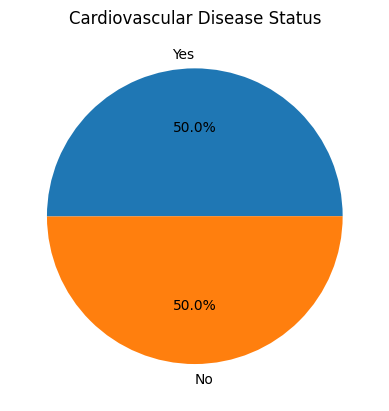

In [ ]:
disease_status = heart['cardio'].value_counts()
disease_status.plot.pie(autopct='%1.1f%%', labels=['Yes', 'No'])
plt.title("Cardiovascular Disease Status")
plt.ylabel('')
plt.show()

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>,
        <Axes: title={'center': 'cholesterol'}>],
       [<Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>,
        <Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>],
       [<Axes: title={'center': 'cardio'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

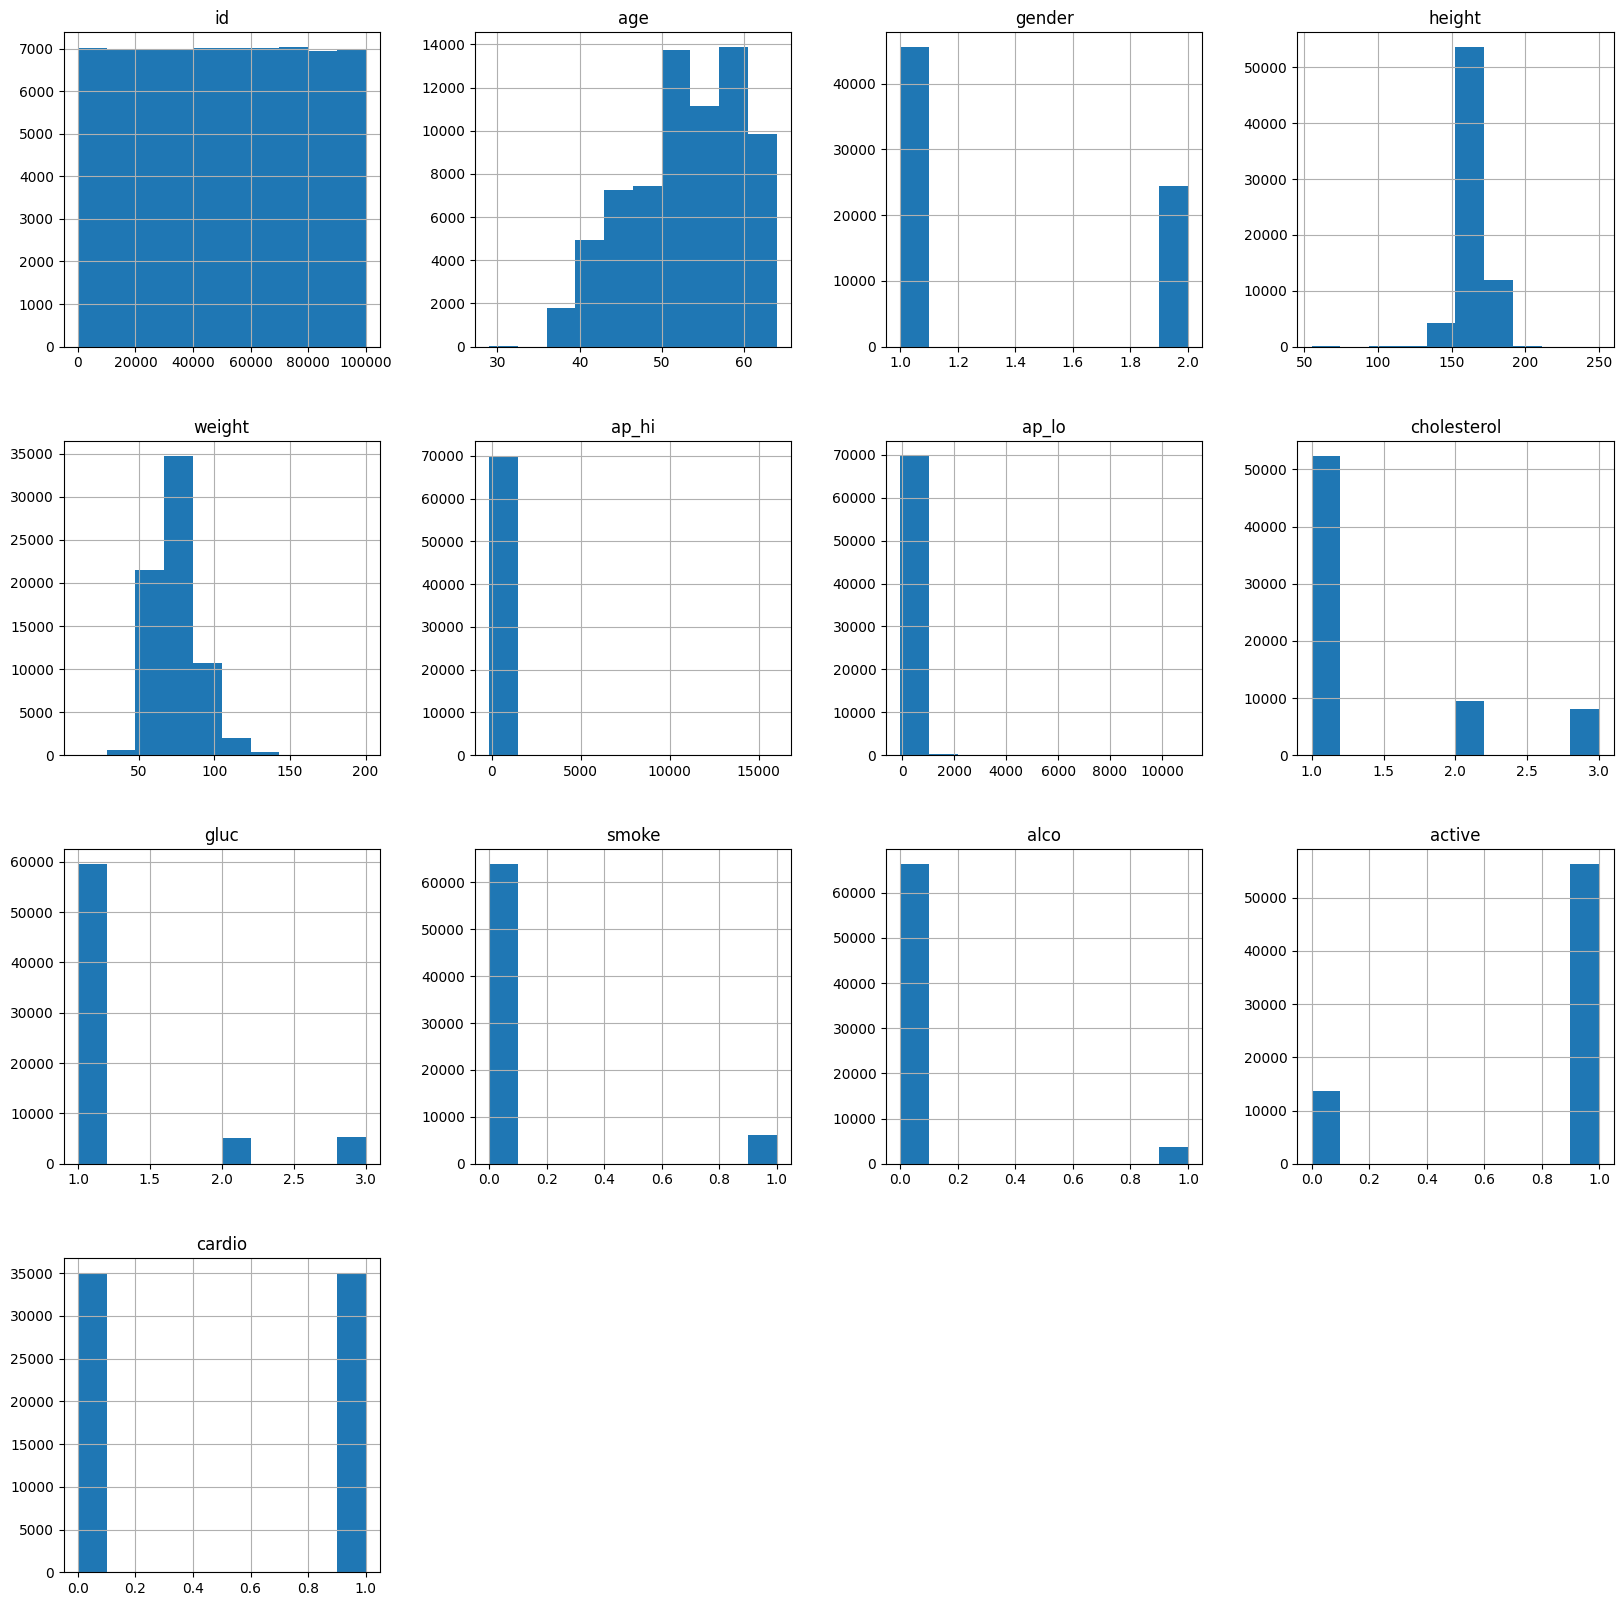

In [ ]:
# see how the data is distributed.
heart.hist(figsize = (20,20))

### **Correlation Matrix**

In [ ]:
# Correlation
heart.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003814,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003814,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,0.003502,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


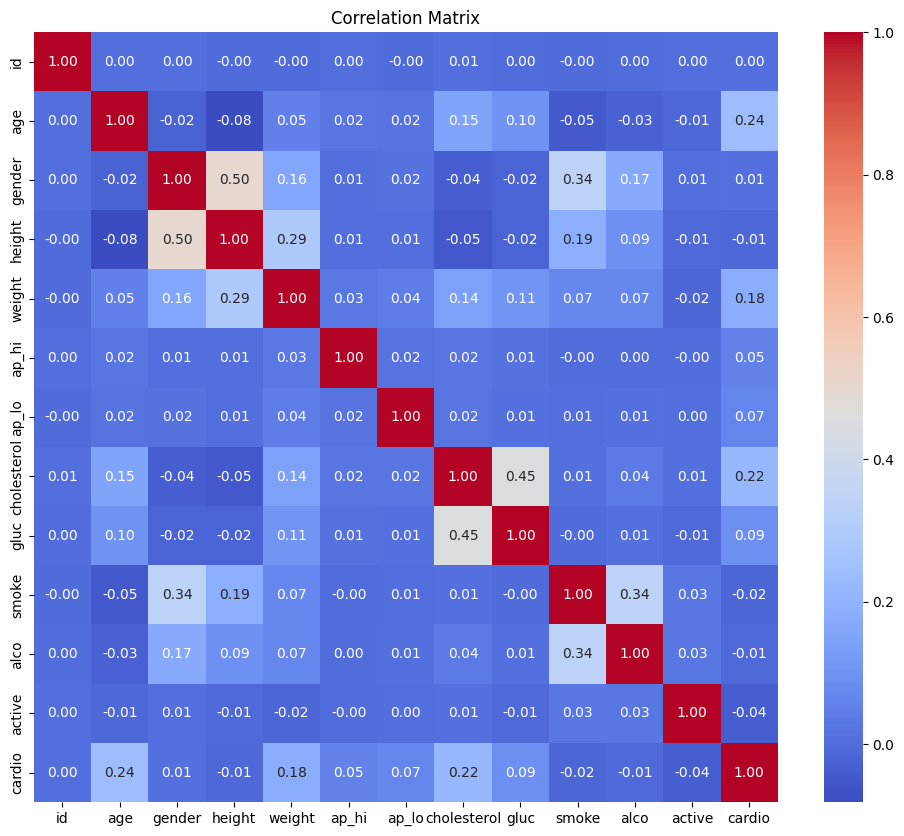

In [ ]:
# Calculate the correlation matrix
correlation_matrix = heart.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
TARGET="cardio"

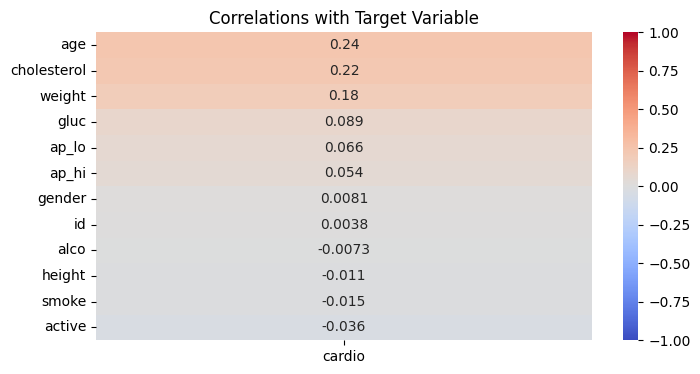

In [ ]:
correlation_matrix = heart.corr()

#We only take the correlations with 'target'.
target_correlation = correlation_matrix[TARGET].sort_values(ascending=False)
target_correlation = target_correlation.drop("cardio")

plt.figure(figsize=(8, 4))
sns.heatmap(target_correlation.to_frame(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title("Correlations with Target Variable")
plt.show()

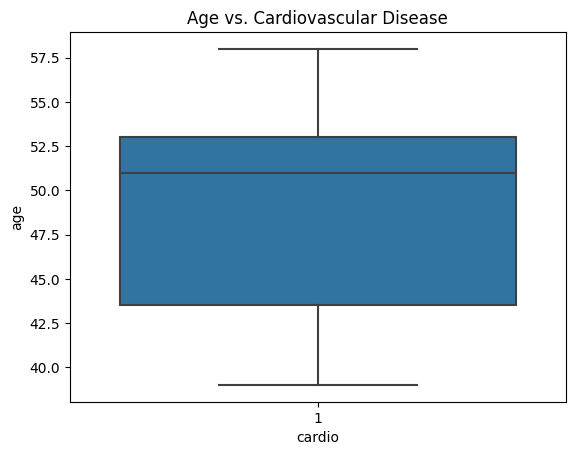

In [ ]:
# Visualize the relationship between 'age' and 'cardio'
sns.boxplot(x='cardio', y='age', data=df)
plt.title('Age vs. Cardiovascular Disease')
plt.show()


# **Find Out Accuracy Levels Of Various Machine Learning Techniques**

In [ ]:
from sklearn.model_selection import train_test_split

#define x and y values as x is all columns except outcome and y is Outcome
X = heart.drop("cardio",axis=1)
y = heart["cardio"]

# split dataset as train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 21)

In [ ]:
# importing classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report

classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),

}
results=pd.DataFrame(columns=['Accuracy in %','F1-score'])
for method,func in classifiers.items():
    func.fit(X_train,y_train)
    pred = func.predict(X_test)
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]
results


,Accuracy in %,F1-score
Logistic Regression,69.66,0.69
Decision Tree,63.48,0.63
Random Forest,72.35,0.72
Support Vector Machines,50.13,0.54
K-nearest Neighbors,63.80,0.62


from matplotlib import pyplot as plt
results['Accuracy in %'].plot(kind='hist', bins=20, title='Accuracy in %')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['F1-score'].plot(kind='hist', bins=20, title='F1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results.plot(kind='scatter', x='Accuracy in %', y='F1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results['Accuracy in %'].plot(kind='line', figsize=(8, 4), title='Accuracy in %')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results['F1-score'].plot(kind='line', figsize=(8, 4), title='F1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Result Maximum
results.loc['Random Forest(Improved)']= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]

results.sort_values(by='Accuracy in %',ascending=False).style.highlight_max()

,Accuracy in %,F1-score
Random Forest,72.350000,0.720000
Logistic Regression,69.660000,0.690000
K-nearest Neighbors,63.800000,0.620000
Random Forest(Improved),63.800000,0.620000
Decision Tree,63.480000,0.630000
Support Vector Machines,50.130000,0.540000


In [ ]:
#Result Minimum
results.loc['Random Forest(Improved)']= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]

results.sort_values(by='Accuracy in %',ascending=False).style.highlight_min()

,Accuracy in %,F1-score
Random Forest,72.350000,0.720000
Logistic Regression,69.660000,0.690000
K-nearest Neighbors,63.800000,0.620000
Random Forest(Improved),63.800000,0.620000
Decision Tree,63.480000,0.630000
Support Vector Machines,50.130000,0.540000


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the models
svm_model = SVC()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Fit the models on the training data
svm_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
svm_preds = svm_model.predict(X_test_scaled)
knn_preds = knn_model.predict(X_test_scaled)
dt_preds = dt_model.predict(X_test_scaled)
lr_preds = lr_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

# Evaluate the models
print("Support Vector Machine Accuracy:", accuracy_score(y_test, svm_preds))
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))

# Classification Report for the best-performing model (Random Forest)
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_preds))

Support Vector Machine Accuracy: 0.7275714285714285
K-Nearest Neighbors Accuracy: 0.6227619047619047
Decision Tree Accuracy: 0.6337142857142857
Logistic Regression Accuracy: 0.7209047619047619
Random Forest Accuracy: 0.7213809523809523
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     10459
           1       0.74      0.69      0.71     10541

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000

